In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
import pandas as pd
import matplotlib.tri as tri
#import i


def plot_spectrum(s,cadence):
    f = np.fft.rfftfreq(len(s))
    plt.loglog(1/f * cadence, np.abs(np.fft.rfft(s)),'.') #mult times cadence
    plt.xlabel("Timescale in days") ## for 1/f
    plt.ylabel("Power Coefficient")
def noise_psd(N, psd = lambda f: 1):
        X_white = np.fft.rfft(np.random.randn(N)); 
        S = psd(np.fft.rfftfreq(N))
        S = S / np.sqrt(np.mean(S**2))
        X_shaped = X_white * S;
        return np.fft.irfft(X_shaped);

def PSDGenerator(f):
    return lambda N: noise_psd(N, f)

@PSDGenerator
def white_noise(f):
    return 1;

@PSDGenerator
def pink_noise(f):
    return 1/np.where(f == 0, float('inf'), np.sqrt(f))

@PSDGenerator
def blue_noise(f):
    return np.sqrt(f);

@PSDGenerator
def violet_noise(f):
    return f;

psd_noise_std = .0041

v_noise = violet_noise(2**14)
v_noise=[point * psd_noise_std + 1 for point in v_noise] #adjusting for error

blue_noise = blue_noise(2**14)
blue_noise=[point * psd_noise_std + 1 for point in blue_noise] #adjusting for error


pink_noise=pink_noise(2**14)
pink_noise=[point * psd_noise_std + 1 for point in pink_noise] #adjusting for error

white_noise=white_noise(2**14)
white_noise=[point * psd_noise_std + 1 for point in white_noise] #adjusting for error



In [ ]:
#Function to find sigmas based on bin size for different lightcurves
def binned_sigma(bin_size, flux):
    
    bin_of_x = np.array([])
    bin_of_x_averages = np.array([])

    counter=0

    for value in flux:
        bin_of_x = np.append(bin_of_x, value)
        counter = counter + 1
        if counter > bin_size - 1:
            counter = 0
            average_of_bin = np.average(bin_of_x)
            bin_of_x_averages = np.append(bin_of_x_averages, average_of_bin)
            bin_of_x = np.array([])

    bin_x_std = np.std(bin_of_x_averages)

    return bin_x_std

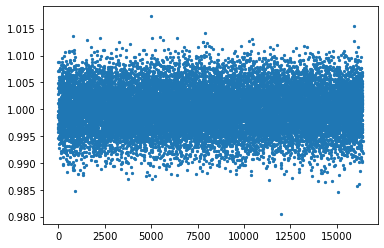

1.0


/var/folders/m_/l_xwjgkd4dn3xl_27hw7d3sh0000gn/T/ipykernel_25791/1502861709.py:11: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(1/f * cadence, np.abs(np.fft.rfft(s)),'.') #mult times cadence


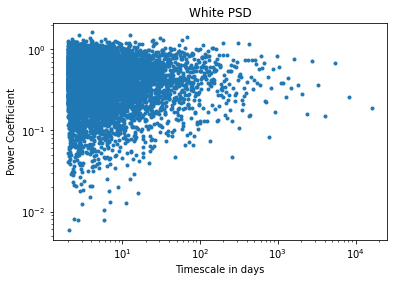

[  10  100  500 1000 2000]
[1.29653384e-03 4.10000000e-04 1.83357574e-04 1.29653384e-04
 9.16787871e-05]


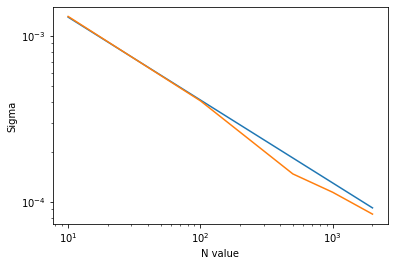

In [ ]:
#WHITE NOISE

#Plotting lightcurve
k =np.vstack((white_noise,np.arange(0,len(white_noise),1))) #this gives white noise an x value
time=k[1,:]
flux=k[0,:]

plt.scatter(time,flux, s=5)
plt.show()


#Plotting power spectrum
plt.title("White PSD")
cadence = time[1] - time[0]
print(cadence)
plot_spectrum(white_noise,cadence)
plt.show()


#Plotting sigma comparison
sigma= psd_noise_std #standard deviation of white noise overall

#putting different bin sizes in function
bin_10 = binned_sigma(10, flux)
bin_100 = binned_sigma(100, flux)
bin_500 = binned_sigma(500, flux)
bin_1000 = binned_sigma(1000, flux)
bin_2000 = binned_sigma(2000, flux)

binned_sigmas = np.array([bin_10,bin_100,bin_500,bin_1000,bin_2000])

#calculating ideal sigma values
ideal_sigma_10 = sigma / (10 ** (1/2))
ideal_sigma_100 = sigma / (100**(1/2))
ideal_sigma_500 = sigma / (500**(1/2))
ideal_sigma_1000 = sigma / (1000**(1/2))
ideal_sigma_2000 = sigma / (2000**(1/2))

ideal_sigmas = np.array([ideal_sigma_10, ideal_sigma_100, ideal_sigma_500, ideal_sigma_1000, ideal_sigma_2000])
ns = np.array([10,100,500,1000,2000])

plt.xlabel("N value")
plt.ylabel("Sigma")
plt.xscale("log")
plt.yscale("log")
plt.plot(ns, ideal_sigmas)
plt.plot(ns,binned_sigmas)
print(ns)
print(ideal_sigmas)
#blue is unbinned white noise #y axis is sigma/sqrt(n) or sigma_bin #x axis is bin size

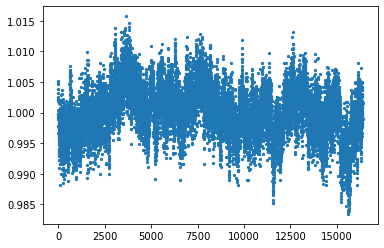

/var/folders/m_/l_xwjgkd4dn3xl_27hw7d3sh0000gn/T/ipykernel_25791/1502861709.py:11: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(1/f * cadence, np.abs(np.fft.rfft(s)),'.') #mult times cadence


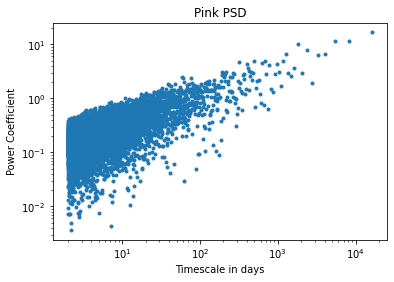

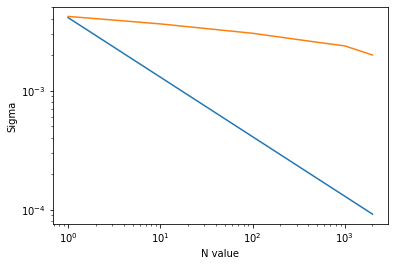

In [ ]:
#PINK NOISE

#Plotting lightcurve
k =np.vstack((pink_noise,np.arange(0,len(pink_noise),1))) #this gives pink noise an x value
time=k[1,:]
flux=k[0,:]

plt.scatter(time,flux, s=5)
plt.show()


#Plotting power spectrum
plt.title("Pink PSD")
cadence = time[1] - time[0]
plot_spectrum(pink_noise,cadence)
plt.show()


#Pink noise sigma comparison
sigma = psd_noise_std #standard deviation of pink noise

bin_1 = binned_sigma(1, flux)
bin_2 = binned_sigma(2, flux)

bin_10 = binned_sigma(10, flux)
bin_100 = binned_sigma(100, flux)
bin_500 = binned_sigma(500, flux)
bin_1000 = binned_sigma(1000, flux)
bin_2000 = binned_sigma(2000, flux)

binned_sigmas = np.array([bin_1, bin_2, bin_10,bin_100,bin_500,bin_1000,bin_2000])

ideal_sigma_1 = sigma / (1 ** (1/2))
ideal_sigma_2 = sigma / (2 ** (1/2))

ideal_sigma_10 = sigma / (10 ** (1/2))
ideal_sigma_100 = sigma / (100**(1/2))
ideal_sigma_500 = sigma / (500**(1/2))
ideal_sigma_1000 = sigma / (1000**(1/2))
ideal_sigma_2000 = sigma / (2000**(1/2))

ideal_sigmas = np.array([ideal_sigma_1, ideal_sigma_2, ideal_sigma_10, ideal_sigma_100, ideal_sigma_500, ideal_sigma_1000, ideal_sigma_2000])
ns = np.array([1,2,10,100,500,1000,2000])


plt.xlabel("N value")
plt.ylabel("Sigma")
plt.xscale("log")
plt.yscale("log")
plt.plot(ns, ideal_sigmas)
plt.plot(ns,binned_sigmas)
#blue is white noise #y axis is sigma/sqrt(n) or sigma_bin #x axis is bin size

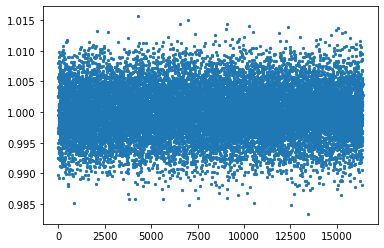

/var/folders/m_/l_xwjgkd4dn3xl_27hw7d3sh0000gn/T/ipykernel_25791/1502861709.py:11: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(1/f * cadence, np.abs(np.fft.rfft(s)),'.') #mult times cadence


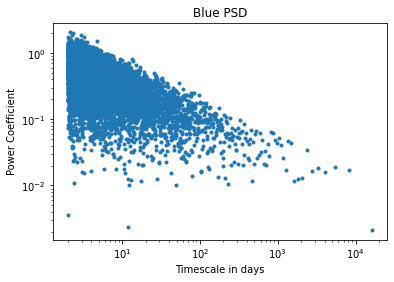

[   1    2   10  100  500 1000 2000]
[4.10000000e-03 2.89913780e-03 1.29653384e-03 4.10000000e-04
 1.83357574e-04 1.29653384e-04 9.16787871e-05]


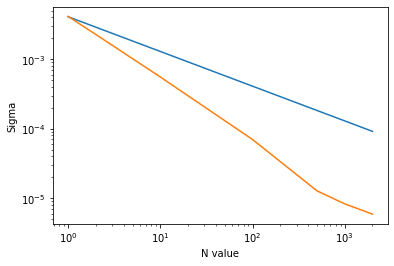

In [ ]:
#BLUE NOISE

#Plotting lightcurve
k =np.vstack((blue_noise,np.arange(0,len(blue_noise),1))) #this gives pink noise an x value
time=k[1,:]
flux=k[0,:]

plt.scatter(time,flux, s=5)
plt.show()


#Plotting power spectrum
plt.title("Blue PSD")
cadence = time[1] - time[0]
plot_spectrum(blue_noise,cadence)
plt.show()


#Pink noise sigma comparison
sigma = psd_noise_std #standard deviation of pink noise

bin_1 = binned_sigma(1, flux)
bin_2 = binned_sigma(2, flux)

bin_10 = binned_sigma(10, flux)
bin_100 = binned_sigma(100, flux)
bin_500 = binned_sigma(500, flux)
bin_1000 = binned_sigma(1000, flux)
bin_2000 = binned_sigma(2000, flux)

binned_sigmas = np.array([bin_1, bin_2, bin_10,bin_100,bin_500,bin_1000,bin_2000])

ideal_sigma_1 = sigma / (1 ** (1/2))
ideal_sigma_2 = sigma / (2 ** (1/2))

ideal_sigma_10 = sigma / (10 ** (1/2))
ideal_sigma_100 = sigma / (100**(1/2))
ideal_sigma_500 = sigma / (500**(1/2))
ideal_sigma_1000 = sigma / (1000**(1/2))
ideal_sigma_2000 = sigma / (2000**(1/2))

ideal_sigmas = np.array([ideal_sigma_1, ideal_sigma_2, ideal_sigma_10, ideal_sigma_100, ideal_sigma_500, ideal_sigma_1000, ideal_sigma_2000])
ns = np.array([1,2,10,100,500,1000,2000])


plt.xlabel("N value")
plt.ylabel("Sigma")
plt.xscale("log")
plt.yscale("log")
plt.plot(ns, ideal_sigmas)
plt.plot(ns,binned_sigmas)
print(ns)
print(ideal_sigmas)
#blue is white noise #y axis is sigma/sqrt(n) or sigma_bin #x axis is bin size

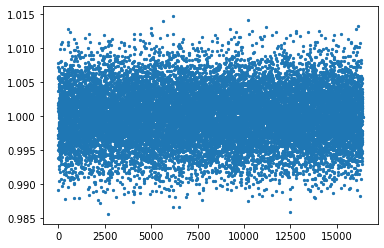

/var/folders/m_/l_xwjgkd4dn3xl_27hw7d3sh0000gn/T/ipykernel_25791/1502861709.py:11: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(1/f * cadence, np.abs(np.fft.rfft(s)),'.') #mult times cadence


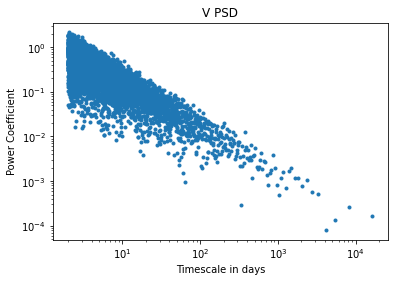

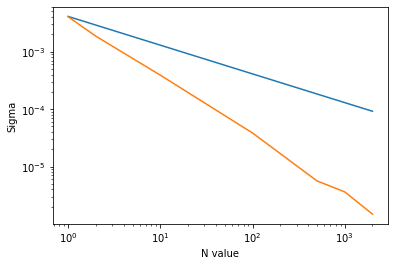

In [ ]:
#V NOISE

#Plotting lightcurve
k =np.vstack((v_noise,np.arange(0,len(v_noise),1))) #this gives pink noise an x value
time=k[1,:]
flux=k[0,:]

plt.scatter(time,flux, s=5)
plt.show()


#Plotting power spectrum
plt.title("V PSD")
cadence = time[1] - time[0]
plot_spectrum(v_noise,cadence)
plt.show()


#Pink noise sigma comparison
sigma = psd_noise_std #standard deviation of pink noise

bin_1 = binned_sigma(1, flux)
bin_2 = binned_sigma(2, flux)

bin_10 = binned_sigma(10, flux)
bin_100 = binned_sigma(100, flux)
bin_500 = binned_sigma(500, flux)
bin_1000 = binned_sigma(1000, flux)
bin_2000 = binned_sigma(2000, flux)

binned_sigmas = np.array([bin_1, bin_2, bin_10,bin_100,bin_500,bin_1000,bin_2000])

ideal_sigma_1 = sigma / (1 ** (1/2))
ideal_sigma_2 = sigma / (2 ** (1/2))

ideal_sigma_10 = sigma / (10 ** (1/2))
ideal_sigma_100 = sigma / (100**(1/2))
ideal_sigma_500 = sigma / (500**(1/2))
ideal_sigma_1000 = sigma / (1000**(1/2))
ideal_sigma_2000 = sigma / (2000**(1/2))

ideal_sigmas = np.array([ideal_sigma_1, ideal_sigma_2, ideal_sigma_10, ideal_sigma_100, ideal_sigma_500, ideal_sigma_1000, ideal_sigma_2000])
ns = np.array([1,2,10,100,500,1000,2000])


plt.xlabel("N value")
plt.ylabel("Sigma")
plt.xscale("log")
plt.yscale("log")
plt.plot(ns, ideal_sigmas)
plt.plot(ns,binned_sigmas)
#blue is white noise #y axis is sigma/sqrt(n) or sigma_bin #x axis is bin size

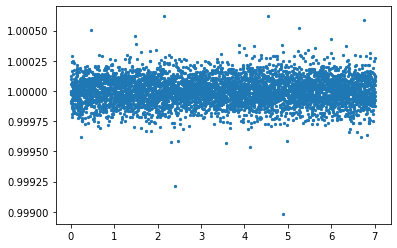

0.0013888694722936634


/var/folders/m_/l_xwjgkd4dn3xl_27hw7d3sh0000gn/T/ipykernel_25791/1502861709.py:11: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(1/f * cadence, np.abs(np.fft.rfft(s)),'.') #mult times cadence


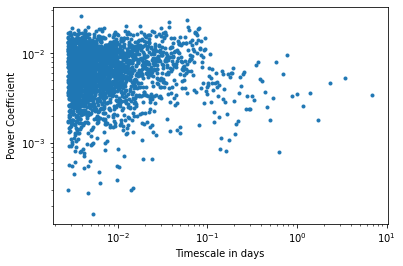

cadence in days:  0.0013888694722936634
Tess data len:  5000
Standard dev:  0.00011304775044840336


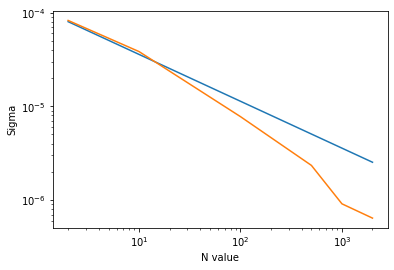

In [ ]:
#normalizing tesscurve
ttv = lk.search_lightcurve('TIC 261136679', cadence = "short").download_all(quality_bitmask='hard')
lc=ttv[0].flatten().to_pandas()
lc.reset_index(inplace=True)
flux= lc["flux"]
time = lc["time"] #time starts at >1000

flux= flux[:5000]
time= time[:5000]
time_start_0 = [value - time[0] for value in time] #make time start at 0

#plotting lightcurve
plt.scatter(time_start_0,flux, s = 5)
plt.show()

#plotting power spectrum
cadence = time[1]-time[0]
print(cadence)
plot_spectrum(flux,cadence) #plot as a line 1/frequencies # blue
plt.show()

print("cadence in days: " , cadence)
print("Tess data len: " , len(flux))
print("Standard dev: " , np.std(flux))


#TESS noise sigma comparison

sigma=np.std(flux) #standard deviation of TESS noise overall

bin_2 = binned_sigma(2, flux)
bin_10 = binned_sigma(10, flux)
bin_100 = binned_sigma(100, flux)
bin_500 = binned_sigma(500, flux)
bin_1000 = binned_sigma(1000, flux)
bin_2000 = binned_sigma(2000, flux)

binned_sigmas = np.array([bin_2, bin_10,bin_100,bin_500,bin_1000,bin_2000])

ideal_sigma_2 = sigma / (2 ** (1/2))
ideal_sigma_10 = sigma / (10 ** (1/2))
ideal_sigma_100 = sigma / (100 ** (1/2))
ideal_sigma_500 = sigma / (500 ** (1/2))
ideal_sigma_1000 = sigma / (1000 ** (1/2))
ideal_sigma_2000 = sigma / (2000 ** (1/2))

ideal_sigmas = np.array([ideal_sigma_2, ideal_sigma_10, ideal_sigma_100, ideal_sigma_500, ideal_sigma_1000, ideal_sigma_2000])
ns = np.array([2, 10,100,500,1000,2000])


plt.xlabel("N value")
plt.ylabel("Sigma")
plt.xscale("log")
plt.yscale("log")
plt.plot(ns, ideal_sigmas)
plt.plot(ns,binned_sigmas)
#blue is white noise

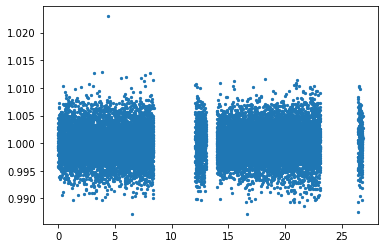

/var/folders/m_/l_xwjgkd4dn3xl_27hw7d3sh0000gn/T/ipykernel_25791/1502861709.py:11: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(1/f * cadence, np.abs(np.fft.rfft(s)),'.') #mult times cadence


0.0013888696703361347


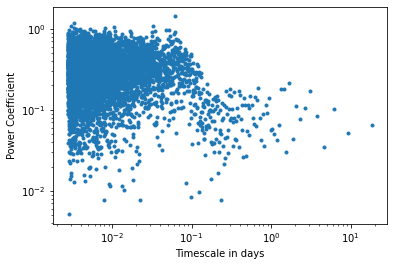

cadence in days:  0.0013888696703361347
Tess data len:  13433
Standard dev:  0.0032572534478508644


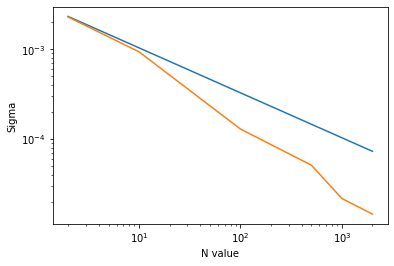

In [ ]:
#normalizing tesscurve
ttv = lk.search_lightcurve('TIC 233188453', cadence = "short").download_all(quality_bitmask='hard')
lc=ttv[0].flatten().to_pandas()
lc.reset_index(inplace=True)
flux= lc["flux"]
time = lc["time"] #time starts at >1000
time_start_0 = [value - time[0] for value in time] #make time start at 0

#plotting lightcurve
plt.scatter(time_start_0,flux, s = 5)
plt.show()

#plotting power spectrum
cadence = time[1]-time[0]
plot_spectrum(flux,cadence) #plot as a line 1/frequencies # blue
print(cadence)
plt.show()

print("cadence in days: " , cadence)
print("Tess data len: " , len(flux))
print("Standard dev: " , np.std(flux))


#TESS noise sigma comparison

sigma=np.std(flux) #standard deviation of TESS noise overall

bin_2 = binned_sigma(2, flux)
bin_10 = binned_sigma(10, flux)
bin_100 = binned_sigma(100, flux)
bin_500 = binned_sigma(500, flux)
bin_1000 = binned_sigma(1000, flux)
bin_2000 = binned_sigma(2000, flux)

binned_sigmas = np.array([bin_2, bin_10,bin_100,bin_500,bin_1000,bin_2000])

ideal_sigma_2 = sigma / (2 ** (1/2))
ideal_sigma_10 = sigma / (10 ** (1/2))
ideal_sigma_100 = sigma / (100 ** (1/2))
ideal_sigma_500 = sigma / (500 ** (1/2))
ideal_sigma_1000 = sigma / (1000 ** (1/2))
ideal_sigma_2000 = sigma / (2000 ** (1/2))

ideal_sigmas = np.array([ideal_sigma_2, ideal_sigma_10, ideal_sigma_100, ideal_sigma_500, ideal_sigma_1000, ideal_sigma_2000])
ns = np.array([2, 10,100,500,1000,2000])


plt.xlabel("N value")
plt.ylabel("Sigma")
plt.xscale("log")
plt.yscale("log")
plt.plot(ns, ideal_sigmas)
plt.plot(ns,binned_sigmas)
#blue is white noise

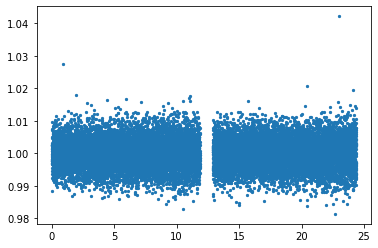

/var/folders/m_/l_xwjgkd4dn3xl_27hw7d3sh0000gn/T/ipykernel_25791/1502861709.py:11: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(1/f * cadence, np.abs(np.fft.rfft(s)),'.') #mult times cadence


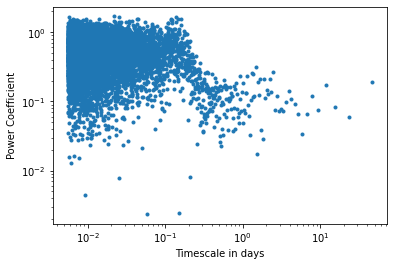

cadence in days:  0.002777846819071783
Tess data len:  16781
Standard dev:  0.004577052098179695


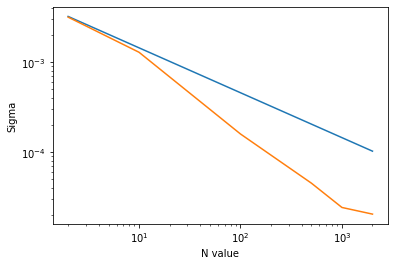

In [ ]:
#normalizing tesscurve
ttv = lk.search_lightcurve('TIC 34798833', cadence = "short").download_all(quality_bitmask='hard')
lc=ttv[0].flatten().to_pandas()
lc.reset_index(inplace=True)
flux= lc["flux"]
time = lc["time"] #time starts at >1000
time_start_0 = [value - time[0] for value in time] #make time start at 0

#plotting lightcurve
plt.scatter(time_start_0,flux, s = 5)
plt.show()

#plotting power spectrum
cadence = time[1]-time[0]
plot_spectrum(flux,cadence) #plot as a line 1/frequencies # blue
plt.show()

print("cadence in days: " , cadence)
print("Tess data len: " , len(flux))
print("Standard dev: " , np.std(flux))


#TESS noise sigma comparison

sigma=np.std(flux) #standard deviation of TESS noise overall

bin_2 = binned_sigma(2, flux)
bin_10 = binned_sigma(10, flux)
bin_100 = binned_sigma(100, flux)
bin_500 = binned_sigma(500, flux)
bin_1000 = binned_sigma(1000, flux)
bin_2000 = binned_sigma(2000, flux)

binned_sigmas = np.array([bin_2, bin_10,bin_100,bin_500,bin_1000,bin_2000])

ideal_sigma_2 = sigma / (2 ** (1/2))
ideal_sigma_10 = sigma / (10 ** (1/2))
ideal_sigma_100 = sigma / (100 ** (1/2))
ideal_sigma_500 = sigma / (500 ** (1/2))
ideal_sigma_1000 = sigma / (1000 ** (1/2))
ideal_sigma_2000 = sigma / (2000 ** (1/2))

ideal_sigmas = np.array([ideal_sigma_2, ideal_sigma_10, ideal_sigma_100, ideal_sigma_500, ideal_sigma_1000, ideal_sigma_2000])
ns = np.array([2, 10,100,500,1000,2000])


plt.xlabel("N value")
plt.ylabel("Sigma")
plt.xscale("log")
plt.yscale("log")
plt.plot(ns, ideal_sigmas)
plt.plot(ns,binned_sigmas)
#blue is white noise

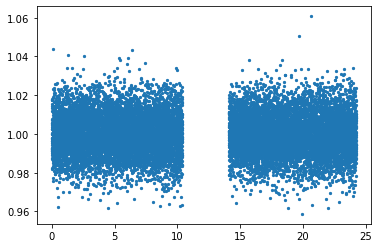

/var/folders/m_/l_xwjgkd4dn3xl_27hw7d3sh0000gn/T/ipykernel_25791/1502861709.py:11: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(1/f * cadence, np.abs(np.fft.rfft(s)),'.') #mult times cadence


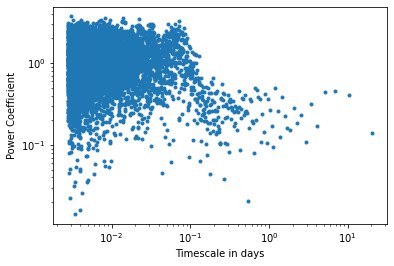

cadence in days:  0.0013889325205127534
Tess data len:  14759
Standard dev:  0.010669393070550186


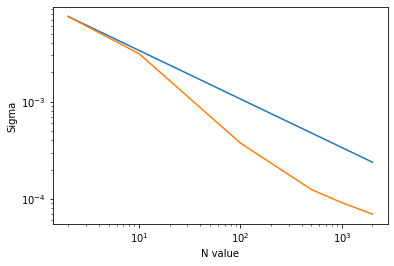

In [ ]:
#normalizing tesscurve
ttv = lk.search_lightcurve('TIC 616545501', cadence = "short").download_all(quality_bitmask='hard')
lc=ttv[0].flatten().to_pandas()
lc.reset_index(inplace=True)
flux= lc["flux"]
time = lc["time"] #time starts at >1000
time_start_0 = [value - time[0] for value in time] #make time start at 0



#plotting lightcurve
plt.scatter(time_start_0,flux, s = 5)
plt.show()

#plotting power spectrum
cadence = time[1]-time[0]
plot_spectrum(flux,cadence) #plot as a line 1/frequencies # blue
plt.show()

print("cadence in days: " , cadence)
print("Tess data len: " , len(flux))
print("Standard dev: " , np.std(flux))


#TESS noise sigma comparison

sigma=np.std(flux) #standard deviation of TESS noise overall

bin_2 = binned_sigma(2, flux)
bin_10 = binned_sigma(10, flux)
bin_100 = binned_sigma(100, flux)
bin_500 = binned_sigma(500, flux)
bin_1000 = binned_sigma(1000, flux)
bin_2000 = binned_sigma(2000, flux)

binned_sigmas = np.array([bin_2, bin_10,bin_100,bin_500,bin_1000,bin_2000])

ideal_sigma_2 = sigma / (2 ** (1/2))
ideal_sigma_10 = sigma / (10 ** (1/2))
ideal_sigma_100 = sigma / (100 ** (1/2))
ideal_sigma_500 = sigma / (500 ** (1/2))
ideal_sigma_1000 = sigma / (1000 ** (1/2))
ideal_sigma_2000 = sigma / (2000 ** (1/2))

ideal_sigmas = np.array([ideal_sigma_2, ideal_sigma_10, ideal_sigma_100, ideal_sigma_500, ideal_sigma_1000, ideal_sigma_2000])
ns = np.array([2, 10,100,500,1000,2000])


plt.xlabel("N value")
plt.ylabel("Sigma")
plt.xscale("log")
plt.yscale("log")
plt.plot(ns, ideal_sigmas)
plt.plot(ns,binned_sigmas)
#blue is white noise

In [ ]:
#
#
#
#
#

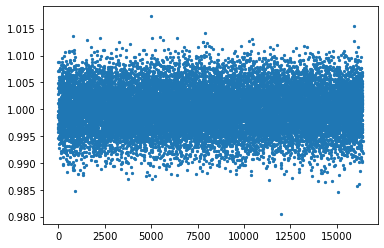

1.0


/var/folders/m_/l_xwjgkd4dn3xl_27hw7d3sh0000gn/T/ipykernel_25791/1502861709.py:11: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(1/f * cadence, np.abs(np.fft.rfft(s)),'.') #mult times cadence


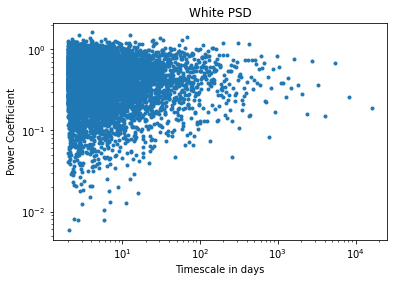

[0.0028719140346632342, 0.0013088387508033241, 0.0004056502291475899, 0.00014693704772706458, 0.00011391074691339071, 8.408402604686366e-05]


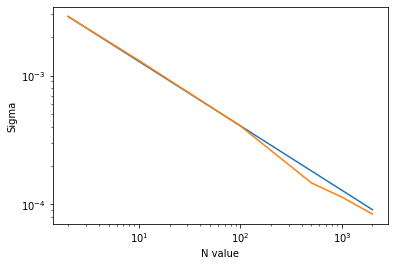

In [12]:
#WHITE NOISE

#Plotting lightcurve
k =np.vstack((white_noise,np.arange(0,len(white_noise),1))) #this gives white noise an x value
time=k[1,:]
flux=k[0,:]

plt.scatter(time,flux, s=5)
plt.show()


#Plotting power spectrum
plt.title("White PSD")
cadence = time[1] - time[0]
print(cadence)
plot_spectrum(white_noise,cadence)
plt.show()


#Plotting sigma comparison
binsizes = (2, 10, 100, 500, 1000, 2000)
binned_sigma = []

for binsize in binsizes:
    nbins = len(flux) / binsize
    np.floor(len(flux)*(binsize))
    means = np.zeros(int(nbins))
    for i in range (0, int(nbins)):

        fluxpiece = flux[int((i*binsize)):int((((i+1)*binsize)))]
        means[i]= np.average(fluxpiece)
    
    std_means = np.std(means)
    binned_sigma.append(std_means)
print(binned_sigma)
    
    
std = np.std(flux)
ideal_sigma_2 = std / (2 ** (1/2))
ideal_sigma_10 = std / (10 ** (1/2))
ideal_sigma_100 = std / (100 ** (1/2))
ideal_sigma_500 = std / (500 ** (1/2))
ideal_sigma_1000 = std / (1000 ** (1/2))
ideal_sigma_2000 = std / (2000 ** (1/2))
ideal_sigmas = np.array([ideal_sigma_2, ideal_sigma_10, ideal_sigma_100, ideal_sigma_500, ideal_sigma_1000, ideal_sigma_2000])

    

    
plt.xlabel("N value")
plt.ylabel("Sigma")
plt.xscale("log")
plt.yscale("log")
plt.plot(binsizes, ideal_sigmas)
plt.plot(binsizes,binned_sigma)

#blue is unbinned white noise #y axis is sigma/sqrt(n) or sigma_bin #x axis is bin size

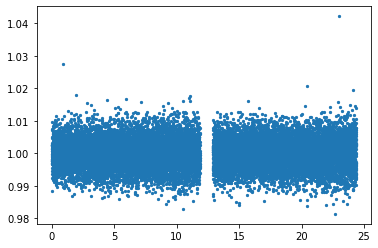

/var/folders/m_/l_xwjgkd4dn3xl_27hw7d3sh0000gn/T/ipykernel_25791/1502861709.py:11: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(1/f * cadence, np.abs(np.fft.rfft(s)),'.') #mult times cadence


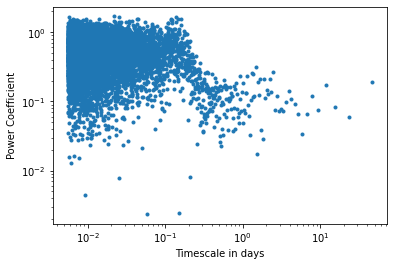

cadence in days:  0.002777846819071783
Tess data len:  16781
Standard dev:  0.004577052098179695
[0.003178109899478083, 0.0012914472257667573, 0.00015894929658559042, 4.505311468061588e-05, 2.4165652555116212e-05, 2.03784796940563e-05]
[0.00323646 0.00144739 0.00045771 0.00020469 0.00014474 0.00010235]


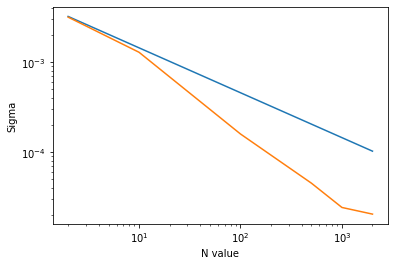

In [ ]:
#normalizing tesscurve
ttv = lk.search_lightcurve('TIC 34798833', cadence = "short").download_all(quality_bitmask='hard')
lc=ttv[0].flatten().to_pandas()
lc.reset_index(inplace=True)
flux= lc["flux"]
time = lc["time"] #time starts at >1000
time_start_0 = [value - time[0] for value in time] #make time start at 0

#plotting lightcurve
plt.scatter(time_start_0,flux, s = 5)
plt.show()

#plotting power spectrum
cadence = time[1]-time[0]
plot_spectrum(flux,cadence) #plot as a line 1/frequencies # blue
plt.show()

print("cadence in days: " , cadence)
print("Tess data len: " , len(flux))
print("Standard dev: " , np.std(flux))


#Plotting sigma comparison
binsizes = (2, 10, 100, 500, 1000, 2000)
binned_sigma = []

for binsize in binsizes:
    nbins = len(flux) / binsize
    np.floor(len(flux)*(binsize))
    means = np.zeros(int(nbins))
    for i in range (0, int(nbins)):

        fluxpiece = flux[int((i*binsize)):int((((i+1)*binsize)))]
        means[i]= np.average(fluxpiece)
    
    std_means = np.std(means)
    binned_sigma.append(std_means)
print(binned_sigma)
    
    
sigma = np.std(flux)
ideal_sigma_2 = sigma / (2 ** (1/2))
ideal_sigma_10 = sigma / (10 ** (1/2))
ideal_sigma_100 = sigma / (100 ** (1/2))
ideal_sigma_500 = sigma / (500 ** (1/2))
ideal_sigma_1000 = sigma / (1000 ** (1/2))
ideal_sigma_2000 = sigma / (2000 ** (1/2))
ideal_sigmas = np.array([ideal_sigma_2, ideal_sigma_10, ideal_sigma_100, ideal_sigma_500, ideal_sigma_1000, ideal_sigma_2000])
print(ideal_sigmas)
    

    
plt.xlabel("N value")
plt.ylabel("Sigma")
plt.xscale("log")
plt.yscale("log")
plt.plot(binsizes, ideal_sigmas)
plt.plot(binsizes,binned_sigma)

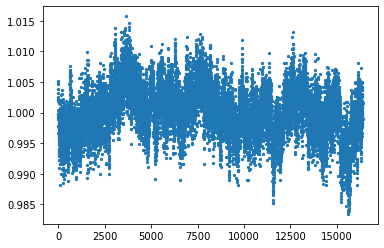

/var/folders/m_/l_xwjgkd4dn3xl_27hw7d3sh0000gn/T/ipykernel_25791/1502861709.py:11: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(1/f * cadence, np.abs(np.fft.rfft(s)),'.') #mult times cadence


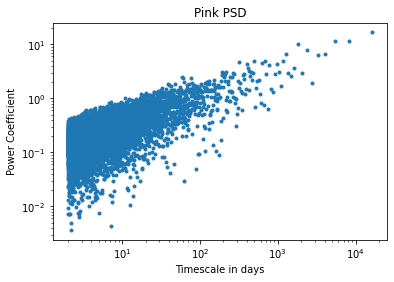

[0.0040198795497455924, 0.0036308609716786374, 0.0030291598050178306, 0.0025484613110295803, 0.0023742055340539047, 0.0019886809528545206]
[2.96607079e-03 1.32646718e-03 4.19465754e-04 1.87590788e-04
 1.32646718e-04 9.37953940e-05]


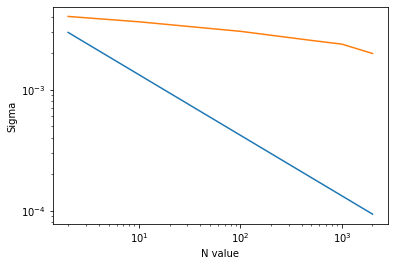

In [ ]:
#PINK NOISE

#Plotting lightcurve
k =np.vstack((pink_noise,np.arange(0,len(pink_noise),1))) #this gives pink noise an x value
time=k[1,:]
flux=k[0,:]

plt.scatter(time,flux, s=5)
plt.show()


#Plotting power spectrum
plt.title("Pink PSD")
cadence = time[1] - time[0]
plot_spectrum(pink_noise,cadence)
plt.show()



#Plotting sigma comparison
#sigma is the standard deviation of the means of a bin size
binsizes = (2, 10, 100, 500, 1000, 2000)
binned_sigma = []

for binsize in binsizes:
    nbins = len(flux) / binsize
    np.floor(len(flux)*(binsize))
    means = np.zeros(int(nbins))
    for i in range (0, int(nbins)):

        fluxpiece = flux[int((i*binsize)):int((((i+1)*binsize)))]
        means[i]= np.average(fluxpiece)
    
    std_means = np.std(means)
    binned_sigma.append(std_means)
print(binned_sigma)
    
    
sigma = np.std(flux)
ideal_sigma_2 = sigma / (2 ** (1/2))
ideal_sigma_10 = sigma / (10 ** (1/2))
ideal_sigma_100 = sigma / (100 ** (1/2))
ideal_sigma_500 = sigma / (500 ** (1/2))
ideal_sigma_1000 = sigma / (1000 ** (1/2))
ideal_sigma_2000 = sigma / (2000 ** (1/2))
ideal_sigmas = np.array([ideal_sigma_2, ideal_sigma_10, ideal_sigma_100, ideal_sigma_500, ideal_sigma_1000, ideal_sigma_2000])
print(ideal_sigmas)
    

    
plt.xlabel("N value")
plt.ylabel("Sigma")
plt.xscale("log")
plt.yscale("log")
plt.plot(binsizes, ideal_sigmas)
plt.plot(binsizes,binned_sigma)

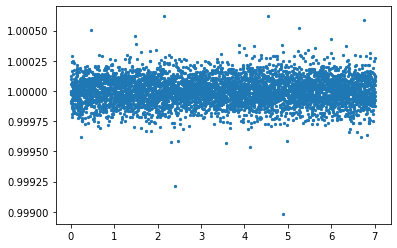

/var/folders/m_/l_xwjgkd4dn3xl_27hw7d3sh0000gn/T/ipykernel_25791/1502861709.py:11: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(1/f * cadence, np.abs(np.fft.rfft(s)),'.') #mult times cadence


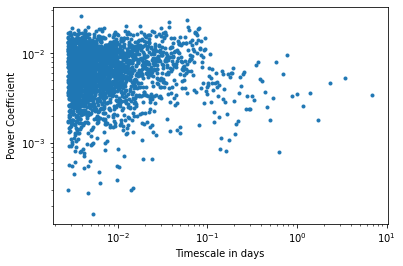

cadence in days:  0.0013888694722936634
Tess data len:  5000
Standard dev:  0.00011304775044840336
binned_sigmas[8.235815080218306e-05, 3.832634195281793e-05, 7.74883272461698e-06, 2.339305774985e-06, 9.100540139287244e-07, 6.406602733877165e-07]
ideal_sigmas[7.99368309e-05 3.57488376e-05 1.13047750e-05 5.05564909e-06
 3.57488376e-06 2.52782455e-06]


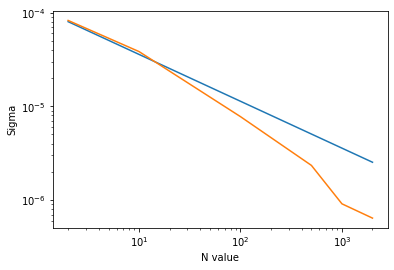

In [ ]:
#normalizing tesscurve
ttv = lk.search_lightcurve('TIC 261136679', cadence = "short").download_all(quality_bitmask='hard')
lc=ttv[0].flatten().to_pandas()
lc.reset_index(inplace=True)
flux= lc["flux"]
time = lc["time"] #time starts at >1000

flux= flux[:5000]
time= time[:5000]
time_start_0 = [value - time[0] for value in time] #make time start at 0

#plotting lightcurve
plt.scatter(time_start_0,flux, s = 5)
plt.show()

#plotting power spectrum
cadence = time[1]-time[0]
plot_spectrum(flux,cadence) #plot as a line 1/frequencies # blue
plt.show()

print("cadence in days: " , cadence)
print("Tess data len: " , len(flux))
print("Standard dev: " , np.std(flux))



#Plotting sigma comparison

#sigma is the standard deviation of the means of a bin given a bin size
binsizes = (2, 10, 100, 500, 1000, 2000)
binned_sigma = []

for binsize in binsizes:
    nbins = len(flux) / binsize
    np.floor(len(flux)*(binsize))
    means = np.zeros(int(nbins))
    for i in range (0, int(nbins)):

        fluxpiece = flux[int((i*binsize)):int((((i+1)*binsize)))]
        means[i]= np.average(fluxpiece)
    
    std_means = np.std(means)
    binned_sigma.append(std_means)
print('binned_sigmas' +str(binned_sigma))
    
    
sigma = np.std(flux)
ideal_sigma_2 = sigma / (2 ** (1/2))
ideal_sigma_10 = sigma / (10 ** (1/2))
ideal_sigma_100 = sigma / (100 ** (1/2))
ideal_sigma_500 = sigma / (500 ** (1/2))
ideal_sigma_1000 = sigma / (1000 ** (1/2))
ideal_sigma_2000 = sigma / (2000 ** (1/2))
ideal_sigmas = np.array([ideal_sigma_2, ideal_sigma_10, ideal_sigma_100, ideal_sigma_500, ideal_sigma_1000, ideal_sigma_2000])
print('ideal_sigmas' + str(ideal_sigmas))
    

    
plt.xlabel("N value")
plt.ylabel("Sigma")
plt.xscale("log")
plt.yscale("log")
plt.plot(binsizes, ideal_sigmas)
plt.plot(binsizes,binned_sigma)